In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import eurostat
import altair as alt
import pymc3 as pm
import arviz as az
import matplotlib.pyplot as plt
import seaborn as sn

WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [ ]:
df = pd.read_csv('./data/health_data.csv')
df.rename({'year_x':'year'},inplace=True,axis=1)

select_year = alt.selection_single(
    name='Select', fields=['year'], init={'year': 2011},
    bind=alt.binding_range(min=2011, max=2017, step=1)
)

df['log gdp'] = np.log(df['GDP per capita'])
df['log mortality'] = np.log(df['Treatable mortality'])
df['Gender'] = df['sex'].replace({'F':'Female','M':'Male'})

figure = alt.Chart(df).mark_point(filled=True,size=50).encode(
    alt.X('log gdp',title='GDP per captita(in logs)',scale=alt.Scale(domain=[9,12])),
    alt.Y('log mortality',title='Treatable mortality (in logs)',scale=alt.Scale(domain=[4,6])),
    color='country',
    column='Gender',
    tooltip=['country']
).configure_axis(
    grid=False
).configure_view(
    strokeWidth=0
).add_selection(select_year).transform_filter(select_year).interactive()



figure.save('./figures/gdp_mortality.html')


# Bayesian analysis


In [2]:
n_values = [1,2,3,4,5,20]
y_values = [1,1,2,2,3,14]
posterior_list = []

for i in range(len(n_values)):
    with pm.Model() as binomial:
        p = pm.Uniform('p', 0, 1)
        y = pm.Binomial('y', p = p, observed = y_values[i], n = n_values[i])
        trace = pm.sample(tune = 2000)
        print(i)
        posterior = az.from_pymc3(trace)
        posterior_list.append(posterior.posterior.p.values.flatten())

C:\Users\chris\AppData\Local\Temp\ipykernel_20064\2425415809.py:9: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(tune = 2000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 74 seconds.


0


C:\Users\chris\AppData\Local\Temp\ipykernel_20064\2425415809.py:9: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(tune = 2000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 68 seconds.


1


C:\Users\chris\AppData\Local\Temp\ipykernel_20064\2425415809.py:9: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(tune = 2000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 71 seconds.


2


C:\Users\chris\AppData\Local\Temp\ipykernel_20064\2425415809.py:9: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(tune = 2000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 90 seconds.


3


C:\Users\chris\AppData\Local\Temp\ipykernel_20064\2425415809.py:9: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(tune = 2000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 58 seconds.
The acceptance probability does not match the target. It is 0.8961258300382609, but should be close to 0.8. Try to increase the number of tuning steps.


4


C:\Users\chris\AppData\Local\Temp\ipykernel_20064\2425415809.py:9: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(tune = 2000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 55 seconds.


5


In [5]:
posterior_list.append(
    pm.Uniform.dist(0,1).random(size=1_000_000)
)
# Add uniform distribution (prior)

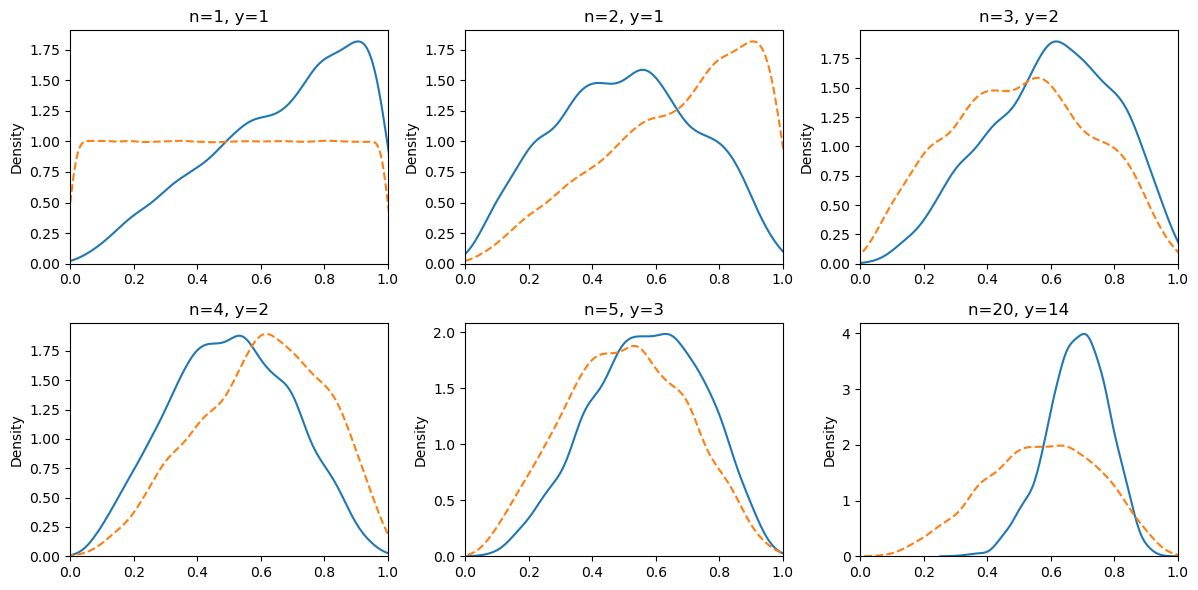

In [6]:
fig, axs = plt.subplots(
    2, 3, figsize = (12,6)
)

for i in range(2):
    for j in range(3):
        sn.kdeplot(posterior_list[3*i+j], ax = axs[i,j]) # probability
        sn.kdeplot(posterior_list[3*i+j-1], ax = axs[i,j], linestyle = '--') # posterior
        plt.gcf().get_axes()[3*i+j] \
            .set_xlim(0,1)
        axs[i,j].set_title('n={}, y={}'.format(n_values[3*i+j], y_values[3*i+j]))

fig.tight_layout();

**NUTS**: No U-Turn Sampler

Bayesian model:
```
with pm.Model() as binomial:
        p = pm.Uniform('p', 0, 1)
        y = pm.Binomial('y', p = p, observed = y_values[i], n = n_values[i])
        trace = pm.sample(tune = 2000)
```

$p$: distribution of parameter

**Bayes rule**:
$$
\Pr(A\mid B) = \frac{\Pr(\text{A and B})}{\Pr(B)} \\
\Pr(P\mid \mathit{data}) = \frac{\Pr(\text{P and data})}{\Pr(data)}
$$

$$
= \frac{{20 \choose 4} p^{14} (1-p)^6 f(p)}{\int_0^1 {20 \choose 4} \pi^{14} (1-\pi)^{6} f(\pi) d\pi}
$$